<a href="https://colab.research.google.com/github/mabittar/Portfolio/blob/master/Risco_Inadimpl%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de Risco de Crédito

Como um modelo de machine learning pode influenciar na taxa de juros que você paga no cartão de crédito???

Com a crise econômica gerada pela pandemia de Covid-19, até os grandes bancos brasileiros reforçaram provisões para o caso de clientes que não cumpram com suas obrigações financeiros, ou seja, o não pagamento de suas dívidas, o que afetou diretamente o resultado destas instituições. Consequentemente afetando todo o sistema financeiro inclusive a taxa de juros que pagamos ao tomar dinheiro emprestado.

Sempre que um credor concede crédito a um devedor, há uma chance de que o valor do empréstimo não seja reembolsado. A medida que analisa essa probabilidade é o risco de `default`. O chamado risco de `default` ou  inadimplência não se aplica apenas a indivíduos que tomam dinheiro emprestado, mas também a empresas que emitem títulos. Sempre que um credor concede crédito, o cálculo do risco de inadimplência de um tomador é crucial como parte de sua estratégia de gerenciamento de risco. 

<center><img alt="Default Risk" src="https://dr5dymrsxhdzh.cloudfront.net/blog/images/ad3043327/2019/05/double-explosure-with-businesss-charts-of-graph-and-rows-of-coins-for-picture-id1051617040.jpg"></center>

Com o rápido aumento na disponibilidade de dados e na capacidade de computação, a área de Machine Learning agora desempenha um papel vital no setor financeiro. Modelos de Machine Learning estão contribuindo significativamente para modelagem de risco de crédito. Grandes bancos e Fintechs têm apostado cada vez mais em modelos de Machine Learning para prevenir a inadimplência de alguns clientes e assim ajustar suas taxas de juros aos clientes finais.

Neste notebook iremos ver como um modelo de Machine Learning para identificar se um cliente possivelmente não conseguirá cumprir com as suas obrigações e consequentemente afetar o risco de crédito e assim a taxa de juros.





Dentre as principais instituições financeira, o **[Nubank](https://nubank.com.br/sobre-nos)** é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela fintech [Nubank](https://nubank.com.br/sobre-nos) a fim de revelar talentos e potenciais contratações pela Fintech.

## Contextualização do Problema

Neste problema, o objetivo é identificar um cliente da Startup Nubank que não cumprirá com suas obrigações financeiras e deixará de pagar a sua fatura do Cartão de Crédito (`default`).

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Nubank_logo.png" width="90px"></p>
  
Vale ressaltar que essa avaliação deve ser realizada quando o cliente solicita o cartão (normalmente no primeiro contato com a instituição).

> OBJETIVO: Criar um modelo que avalie se um cliente ficará inadimplente.


Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.

### Instalando bibliotecas

Nesse passo iremos instalar as bibliotecas que usaremos nas nossas análises

In [71]:
!pip install biokit scikit-optimize scikit-plot;

## Importando os Dados

Os dados utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.

In [72]:
#importando bibliotecas iniciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#definindo padrão para o Seaborn
sns.set_style()


In [73]:
link = "http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0"
df = pd.read_csv(link)

## Análise Exploratória dos Dados

Agora com os nossos dados importados para o notebook, vamos inspecioná-lo verificando suas dimensões e estrutura geral dos dados

In [74]:
#dimensões do dataset
print("Entradas ou linhas: {}".format(df.shape[0]))
print("Colunas ou variáveis: {}".format(df.shape[1]))

Entradas ou linhas: 45000
Colunas ou variáveis: 43


Nosso dataset possui 45.000 linhas e 43 variáveis distintas.

No próximo passo vamos observar as 5 primeiras linhas para facilitar a visualização adiante:

In [75]:
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [76]:
print(list(df))

['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 'credit_limit', 'reason', 'income', 'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 'application_time_applied', 'application_time_in_funnel', 'email', 'external_data_provider_credit_checks_last_2_year', 'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 'external_data_provider_first_name', 'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel', 'profile_phone_number', 'reported_income', 'shipping_state', 'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud']


### Observações Iniciais

- A coluna `ids` é anônima e representa o identificador único do cliente. Normalmente essa coluna não influência no modelo de machine learning.

- A coluna `target_default`é o nosso **alvo**. Essa coluna representa no dataset se o cliente cumpriu ou não com as obrigações junto a instituição financeira.

- As colunas `score_1` e `score_2` estão codificadas de alguma forma.  As colunas `score_3`, `score_4`, `score_5` e `score_6` são numéricas. Essas variáveis classificam o cliente quanto a pontuação de crédito e iremos verificar a quantidade de códigos para analisar a sua transformação para categorias.

- existem outras variáveis que apresentam algum tipo de codificação, como ['reason', 'state', 'zip', 'channel', 'job_name', 'real_state'] que estão codificadas e também precisarão de alguma análise mais aprofundada para saber se é possível extrair alguma informação das mesmas.

- A coluna `lat_lon` está em formato string contendo uma tupla com as coordenadas. A coluna `shipping_zip_code` é referente ao CEP do canal de comunicação indicado pelo cliente, assim como a coluna `zip` provavelmente representa o CEP do imóvel onde o empréstimo foi realizado.

- As colunas `last_amount_borrowed`, `last_borrowed_in_months`, `credit_limit` indicam a existência de empréstimos, quando o último empréstimo foi realizado e o limite de crédito para o cliente.


In [77]:
#vamos verificar o resumo estatístico
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Do resumo estatístico podemos observar que:

- A coluna `external_data_provider_credit_checks_last_2_year` possui praticamente metade dos valores ausentes e valores máximo, mínimos e desvio padrão igual a 0 (zero), portanto não será útil nas avaliações.

- A coluna `external_data_provider_email_seen_before` possui um valor -999 e irá distorcer as análises futuras.

- A coluna `reported_income` possui valores infinitos, pelo rótulo da coluna podemos inferir que representa os valores informados de recebíveis do cliente. Podemos substituir esse outlier pela mediana dos valores.

No próximo passo iremos verificar o tipo das variáveis que compõe o Dataset para separarmos as variáveis categóricas:

In [78]:
df.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

Outra análise importante é verificarmos a ausência de dados:

In [79]:
#valores ausentes
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))

target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_defaulted_loans       

Em relação à porcentagem de valores ausentes identificados neste dataset:

- Diversas variáveis como `['target_fraud', 'last_amount_borrowed', 'last_borrowed_in_months', 'ok_since', 'external_data_provider_credit_checks_last_2_year']` possuem mais da metade dos valores ausentes.

- As variáves ['external_data_provider_credit_checks_last_year', 'credit_limit', 'n_issues'] possuem entre 25-34% do seus valores ausentes.

- A variável alvo `target_default` contém valores nulos que serão eliminados do dataset.

Neste projeto, o caso mais extremo `target_fraud` não representa um problema, pois é uma variável alvo que não interessa para a análise de risco de inadimplência. A mesma possui praticamente 97% dos dados ausentes. Já as demais features deverão ser usadas com o devido cuidado.

Uma outra análise interessante de se fazer diz respeito à contagem de valore únicos por features. Muitas vezes, variáveis numéricas podem esconder classes/categorias que melhor representariam uma feature, ou revelar uma quantidade elevada de classes para "variáveis categóricas".

In [80]:
#valores únicos
print (df.nunique().sort_values())

external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts    

Novamente em relação a variável `external_data_provider_credit_checks_last_2_year` há algum distorção em relação aos dados fornecidos. Nessa etapa foi possível observar também que a coluna `channel` possui apenas um valor. Como não há maiores informações sobre estes dados iremos excluir as duas colunas para que não interfiram nas próximas etapas.

Também é possível observar que a coluna `profile_phone_number` possui 45.000 entradas únicas e provavelmente não irá trazer nenhuma contribuição relevante ao modelo.

In [81]:
#Eliminar entradas NaN no vetor alvo
df.dropna(subset=['target_default'], inplace=True)

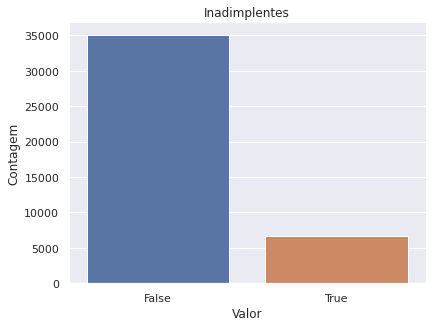

In [82]:
#Proporção de inadimplentes
fig, ax = plt.subplots()
sns.countplot(x='target_default', data=df, ax=ax)
ax.set_title("Inadimplentes")
ax.set_xlabel("Valor")
ax.set_ylabel("Contagem")
plt.show()
plt.savefig("Default-inadimplentes.jpg")
plt.close()

In [83]:
# balanceamento das classes
neg, pos = np.bincount(df['target_default'])
total = neg + pos
print('Amostas:\n    Total: {}\n    Positivos: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Amostas:
    Total: 41741
    Positivos: 6661 (15.96% of total)



### Preparação dos Dados

Na etapa anterior pudemos observar algumas características dos dados disponíveis, agora iremos prosseguir com o tratamento e limpeza dos dados.

In [84]:
#cópia de segurança
df_clean = df.copy()

In [85]:
# drop das colunas
limpeza = ['ids', 'target_fraud', 'external_data_provider_credit_checks_last_2_year', 'channel']
df_clean.drop(labels=limpeza, axis=1, inplace=True )

In [86]:
#substituição dos valores infinitos
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf, np.nan)

In [87]:
# substituição do -999
df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before']=np.nan

In [88]:
# elminar colunas sem informação aparente ou que demandam mais pesquisa
# mantido a categoria ZIP
drop_var = ['reason', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags',
            'application_time_applied', 'email', 'marketing_channel',
            'profile_phone_number', 'shipping_state']
df_clean.drop(labels=drop_var, axis=1, inplace=True)

Apesar de não haver maiores informações sobre as *features*, podemos assumir como premissa que muitos valores são nulos devido a dois fatores:

1. Há alguns itens que não são obrigatórios durante a etapa de preenchimento dos formulários, como a informação sobre o perfil do cliente no Facebook; e
2. Não existe observação alguma referente à coluna, como é caso das colunas `['last_amount_borrowed', 'last_borrowed_in_months', 'n_issues']`.

De maneira geral, para as variáveis que se enquadram no segundo caso, os valores NaN serão substituídos por zero. Para as variáveis numéricas, será adotado o valor da mediana, e para as categóricas o valor mais frequente.

Vamos plotar um gráfico de dispersão das variáveis  `Income` e `Limite de 
Crédito`.

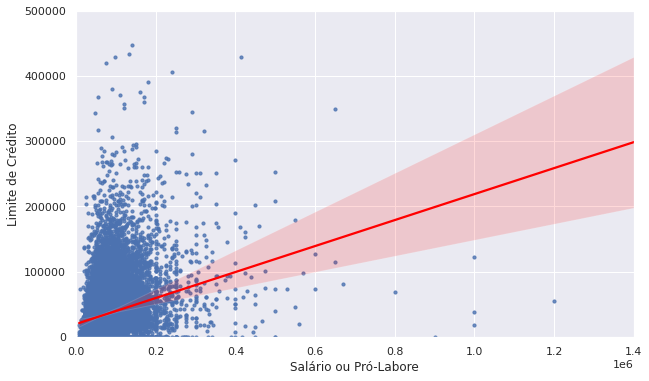

In [89]:
#@title Gráfico de Dispersão Crédito x Income
# scatter plot
fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlim(left=-1000,right=1400000)
ax.set_ylim(bottom=-1000,top=500000)
sns.regplot(x='income', y='credit_limit', scatter_kws={"s": 10}, 
            line_kws={"color": "red"}, data=df_clean, ax=ax);
ax.set_ylabel('Limite de Crédito')
ax.set_xlabel('Salário ou Pró-Labore')
ax.plot()
fig.savefig("Default-scatterplot.jpg")

Do gráfico anterior podemos observar pela linha vermelha que conforme o `income` (ou salário / pró-labore) aumenta, o `limite de crédito` também se eleva (indica uma correlação positiva), porém existem algumas distorções na base de dados, pois alguns limites de crédito são bem elevados em relação ao outro parâmetro.

Nosso próximo passo será completar os dados ausentes nas colunas:
 - last_amount_borrowed: iremos preencher os valores não informados (NA) com 0;
 - last_borrowed_in_months: iremos preencher os valores não informados (NA) com 0;
 - n_issues: iremos preencher os valores não informados (NA) com 0;
 - para as demais colunas numéricas iremos preencher com a mediana dos valores;
 - para as outras colunas categóricas iremos preencher com os dados mais frequentes.

In [90]:
from sklearn.impute import SimpleImputer

num_df = df_clean.select_dtypes(exclude='object').columns
cat_df = df_clean.select_dtypes(include='object').columns

#substituindo valores ausentes
df_clean.last_amount_borrowed.fillna(value=0, inplace=True)
df_clean.last_borrowed_in_months.fillna(value=0, inplace=True)
df_clean.n_issues.fillna(value=0, inplace=True)

In [91]:
# variáveis numéricas
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imputer.transform(df_clean.loc[:,num_df])


In [92]:
#variáveis categóricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:,cat_df])
df_clean.loc[:,cat_df] = imputer.transform(df_clean.loc[:,cat_df])

Vamos verificar se todas as variáveis foram preenchidas corretamente:

In [93]:
df_clean.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
zip                                                0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                             

## Divisão dos dados entre treinamento e teste

Como a divisão do conjunto de dados em conjuntos de treinamento e teste é feita de forma aleatória,  deve ocorrer antes da normalização / padronização dos dados. 

O conjunto de teste não é usado durante a fase de tratamento dos dados ou no treinamento, sendo somente usado no final para avaliar quão bem o modelo generaliza para novos dados. 

Isso é especialmente importante com conjuntos de dados desbalanceados, onde o overfitting é um problema significativo devido à falta de dados de treinamento.

Por que isso seria problema? 

Com tão poucas observações verdadeiras em relação as falsas, o modelo de treinamento passará a maior parte do tempo em exemplos falsos e não aprenderá o suficiente com os verdadeiros. Por exemplo, se o tamanho da sua subdivisão de dados (ou lote) for 128, muitas amostras não terão exemplos verdadeiros, então os gradientes serão menos precisos.

In [94]:
#1. Dividindo entre teste e treino
from sklearn.model_selection import train_test_split

# separar as variáveis independentes da variável alvo
X = df_clean.drop('target_default', axis=1)
y = df_clean['target_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Podemos agora comparar a quantidade de  verdadeiros e falsos no dataset original e no que iremos usar de treinamento para os modelos

In [95]:
print('Dataset original \n Amostas:\n    Total: {}\n    Positivos: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))
neg_t, pos_t = np.bincount(y_train)
total_t = neg_t + pos_t
print('Dataset de treino \n Amostas:\n    Total: {}\n    Positivos: {} ({:.2f}% of total)\n'.format(
    total_t, pos_t, 100 * pos_t / total_t))


Dataset original 
 Amostas:
    Total: 41741
    Positivos: 6661 (15.96% of total)

Dataset de treino 
 Amostas:
    Total: 33392
    Positivos: 5397 (16.16% of total)



### Normalização dos dados

O próximo passo na preparação dos dados é realizar o `scaling`, ou seja, normalizar os dados

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#normalizar apenas as colunas numéricas
X_train.loc[:,num_df] = scaler.fit_transform(X_train.loc[:,num_df].values)
X_test.loc[:,num_df] = scaler.transform(X_test.loc[:,num_df].values)

print('Dimensões Treinamento:', X_train.shape)
print('Dimensões Teste:', X_test.shape)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Dimensões Treinamento: (33392, 26)
Dimensões Teste: (8349, 26)


### Categorização dos Dados

No próximo passo iremos realizar o encoder dos dados

In [97]:
#Ecoding o dataset
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

#obter apenas as variáveis categóricas
cat_X = X_train.select_dtypes(include='object').columns

#armazenando o dicionário de dados
label_dict = defaultdict(LabelEncoder)

#fit do enconder
label = LabelEncoder()

#aplicando o encoder nas colunas categóricas
df_clean.apply(lambda i: label_dict[i.name].fit(i))

#aplicando o enconder nas datasets de treino e teste
X_train.loc[:,cat_X] = X_train.loc[:,cat_X].apply(lambda i: label_dict[i.name].transform(i))
X_test.loc[:,cat_X] = X_test.loc[:,cat_X].apply(lambda i: label_dict[i.name].transform(i))


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


Com mais esse passo executado todos os dados categóricos do nosso dataset foram convertidos para números.

Podemos checar o nosso dicionário de valores para as categorias que foram convertidas:

In [98]:
label_dict

defaultdict(sklearn.preprocessing._label.LabelEncoder,
            {'application_time_in_funnel': LabelEncoder(),
             'credit_limit': LabelEncoder(),
             'external_data_provider_credit_checks_last_month': LabelEncoder(),
             'external_data_provider_credit_checks_last_year': LabelEncoder(),
             'external_data_provider_email_seen_before': LabelEncoder(),
             'external_data_provider_fraud_score': LabelEncoder(),
             'facebook_profile': LabelEncoder(),
             'income': LabelEncoder(),
             'last_amount_borrowed': LabelEncoder(),
             'last_borrowed_in_months': LabelEncoder(),
             'n_accounts': LabelEncoder(),
             'n_bankruptcies': LabelEncoder(),
             'n_defaulted_loans': LabelEncoder(),
             'n_issues': LabelEncoder(),
             'ok_since': LabelEncoder(),
             'real_state': LabelEncoder(),
             'reported_income': LabelEncoder(),
             'risk_rate': LabelE

Precisamos ainda converter nossa variável alvo, pois ainda estão como True or False.

In [99]:
#Converter valores para a variável alvo de treino
y_train.replace(False, int(0), inplace=True)
y_train.replace(True, int(1), inplace=True)
#Converter valores para a variável alvo de teste
y_test.replace(False, int(0), inplace=True)
y_test.replace(True, int(1), inplace=True)

Antes de iniciarmos nossos modelos de Machine Learning vamos plotar e verificar a correlação entre as variáveis, se nos trazem mais algum *insight* sobre os dados, porém precisamos ajustar nosso dataset para as mesmas condições de treino e testes (normalizado e codificado).

In [100]:
#criando um dataframe temporário
df_tmp = df_clean.copy()
#normalizando os dados numéricos
df_tmp.loc[:,num_df] = scaler.transform(df_clean.loc[:,num_df].values)
#fazendo encoder dos dados categóricos
df_tmp.loc[:,cat_X] = df_tmp.loc[:,cat_X].apply(lambda i: label_dict[i.name].transform(i))

#precisamos ainda converter nossa variável alvo para valores numéricos
df_tmp[["target_default"]] *= 1

Computing correlation


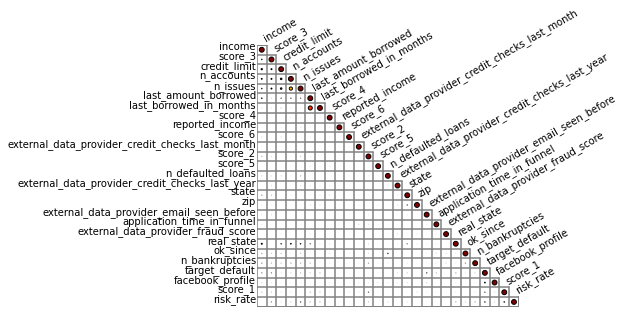

In [101]:
from biokit.viz import corrplot
c = corrplot.Corrplot(df_tmp)
plt.rcParams['figure.figsize'] = (8,6)
c.plot(colorbar=False, method='circle', cmap='jet', shrink=.5, rotation=30, lower='circle')

#voltando para a configuração original
plt.rcParams['figure.figsize'] = (6.4, 4.8)

Do gráfico anterior podemos observar que a correlação entre as variáveis do dataset e a variável alvo são muito fracas.

Um dado chama atenção que é a correlação entre o perfil do facebook e o risco de default do cliente (não era esperado).


Fizemos um grande trabalho para limpeza e organização dos dados, vamos plotar alguns histogramas para verificarmos como estão as distribuições dos dados.

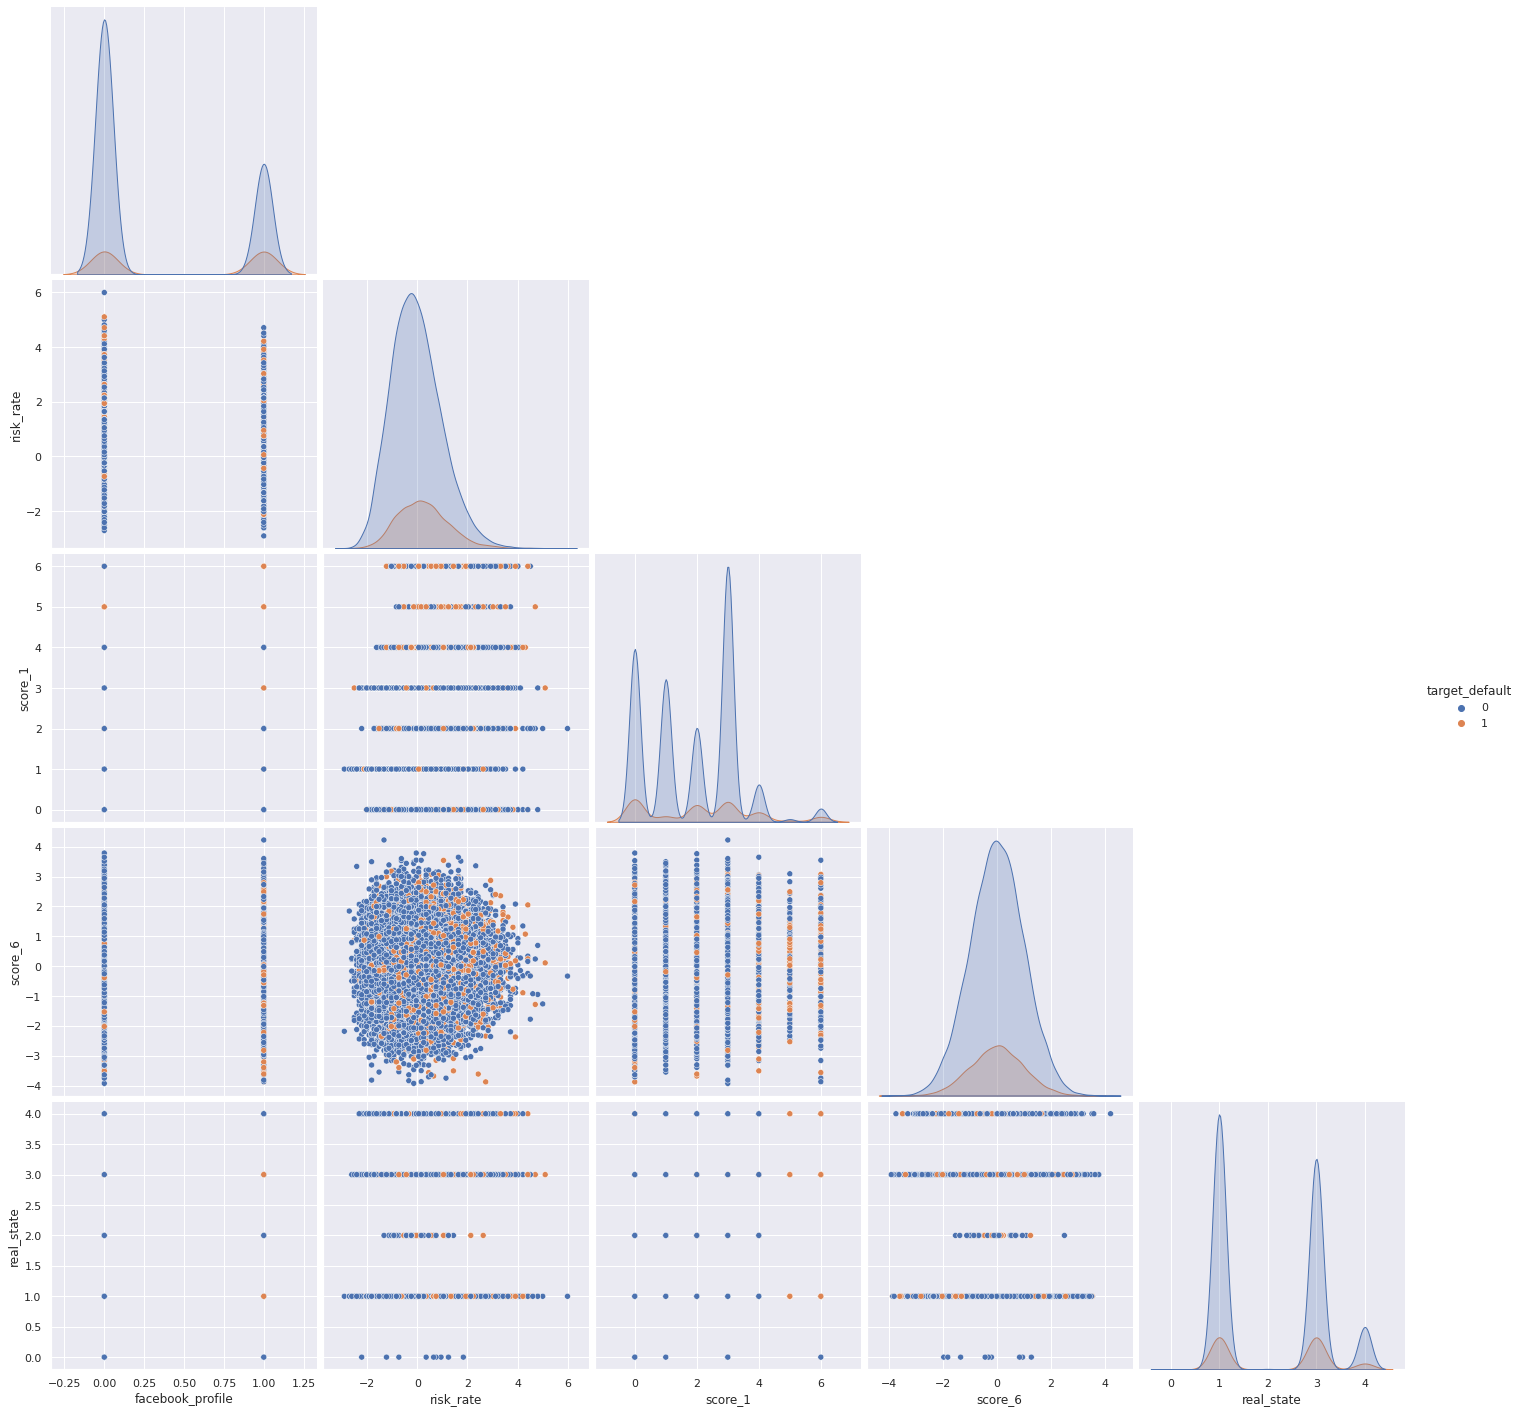

In [117]:
#@title Gráfico de Pares
# pairplot
plt.close()
sns.set()
cols = ['target_default', 'facebook_profile', 'risk_rate', 'score_1', 'score_6', 'real_state'];
sns.color_palette("crest", as_cmap=True)
sns.pairplot(df_tmp[cols], height = 4,  hue="target_default", corner=True);
plt.show();
plt.savefig("Default-pairplot.jpg")
plt.close()

Depois de rever nossas distribuições, correlações e visualizá-las agrupadas, vamos rever alguns *insights*:

- Correlações fracas entre as variável alvo e outras variáveis disponível.

- Variáveis ​​inesperadas como as mais correlacionadas.

- O número de empréstimos anteriores inadimplentes influencia fortemente o limite de crédito.

- Renda mais alta não significa necessariamente limite de crédito mais alto.

# Modelos de Machine Learning

## Ensemble

Por que usar apenas um modelo de machine learning, por que apenas uma forma de fazer previsão? Imagine que você poderia aproveitar o melhor de cada mundo, usar os pontos fortes de cada estimador e até mesmo combiná-los.

Você entenderá a importância do método de `Ensemble` ao entrar no [universo do Machine Learning](https://sigmoidal.ai/como-salvar-seu-modelo-de-machine-learning/) e ficar perdido com a quantidade de modelos diferentes que temos a disposição. Temos regressão linear, polinomial e logística, gradiente descendente, [XGBoost](https://sigmoidal.ai/xgboost-aprenda-algoritmo-de-machine-learning-em-python/), máquina de vetores de suporte, naive bayes, árvores de decisão, Random Forest, entre outros.

Observe abaixo o resultado do classificador de votação para os diferentes modelos. No caso, o VotingClassifier fez a combinação dos modelos.

A documentação original sobre a metodologia pode ser consultada neste [link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html).

Após a divisão entre treino e teste vamos verificar se as dimensões são equivalentes

In [103]:
print(X_train.shape ,y_train.shape, X_test.shape, y_test.shape)

(33392, 26) (33392,) (8349, 26) (8349,)


In [104]:
#importando bibliotecas necessárias
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, classification_report


#2. Instanciando os modelos
model_xgbc = XGBClassifier()
model_sgd = SGDClassifier()
model_svc = SVC()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
voting_clf = VotingClassifier(estimators=[('xgbc', model_xgbc), ('sgd', model_sgd), ('svc', model_svc),
                                          ('dt', model_dt), ('rf', model_rf)],
                              n_jobs=-1 , voting='hard')

#3. os dados já foram separados anteriormente

#4. Fit do modelo
for model in (model_xgbc, model_sgd, model_svc, model_dt, model_rf, voting_clf):
  model.fit(X_train, y_train)

#5. Fazendo previsões em cima do modelo treinado
model = []
accuracy = []
roc_score = []
for clf in (model_xgbc, model_sgd, model_svc, model_dt, model_rf, voting_clf):
  y_pred = clf.predict(X_test)
  model.append(clf.__class__.__name__)
  accuracy.append(accuracy_score(y_test,y_pred))

#6. Verificando resultados
col = ['Acurácia']
resultado = pd.DataFrame(data=accuracy, index=model, columns=col)
resultado


,Acurácia
XGBClassifier,0.848365
SGDClassifier,0.847048
SVC,0.848605
DecisionTreeClassifier,0.748353
RandomForestClassifier,0.849203
VotingClassifier,0.848964


Do modelo `Random Forest` podemos aferir quais variáveis (*features*) tiveram mais peso para o modelo.

In [105]:
predictors = X_train.columns
predictors

Index(['score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
       'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months',
       'credit_limit', 'income', 'facebook_profile', 'state', 'zip',
       'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans',
       'n_accounts', 'n_issues', 'application_time_in_funnel',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_fraud_score', 'reported_income'],
      dtype='object')

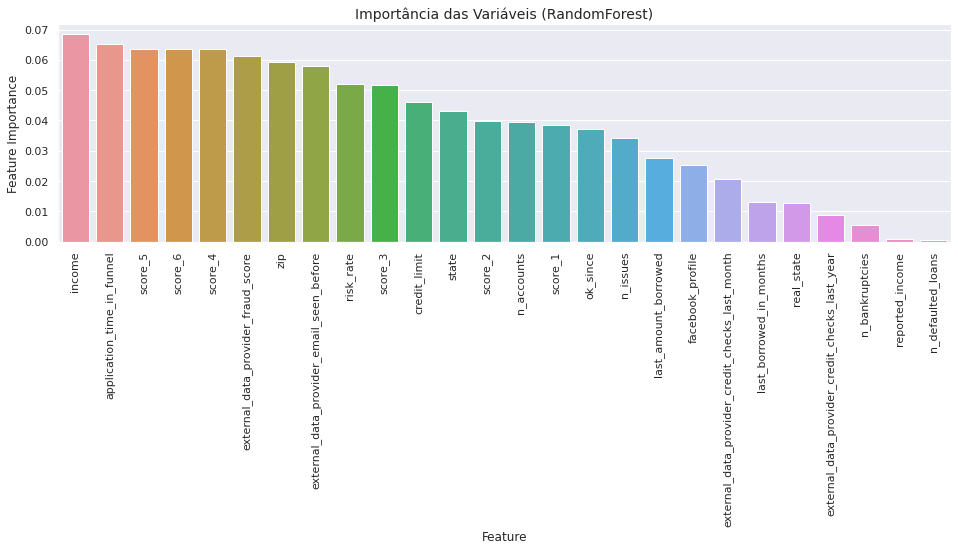

In [106]:
#@RandomForest Feature Importance
tmp = pd.DataFrame({'Feature': predictors, 'Feature Importance': model_rf.feature_importances_})
tmp = tmp.sort_values(by='Feature Importance', ascending=False)
plt.figure(figsize=(16,4))
plt.title('Importância das Variáveis (RandomForest)', fontsize=14)
s = sns.barplot(x='Feature', y='Feature Importance', data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();
plt.savefig("Default-feature_importance.jpg")
plt.close()

## XGboost

Do método `Ensemble` podemos observar que o XGBoost apresentou boa acurácia, portanto iremos utilizá-los nos próximos passos para ajustes e refinamentos dos hiper parâmetros.

## Rebalanceando o Dataset

Como vimos anteriormente nosso dataset possui aproximadamente 20% classificado como `default`, tal desproporção causará distorções no modelo.

Adiante iremos utilizar algumas técnicas para rebalancear as amostras


### scale_pos_weight

Conforme a [documentação oficial](https://xgboost.readthedocs.io/en/latest/parameter.html) para o XGBoost Classifier há um hyper parâmetro a ser ajusta em situações desbalanceadas, é o *scale_pos_weight* 

In [107]:
def fpreproc(dtrain):
    ratio = float((dtrain.values== 0).sum() / (dtrain.values == 1).sum())
    return (print("Ajuste o hyper parametro scale_pos_weight para {}". format(ratio)))

fpreproc(y_train)

Ajuste o hyper parametro scale_pos_weight para 5.187141004261627


In [108]:
# Aplicando Validação Cruzada com K-Fold
from sklearn.model_selection import cross_val_score
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=1,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5.187141004261627, seed=None,
              silent=None, subsample=0.9, verbosity=1)


scores = cross_val_score(xgb, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1)
print("Scores = ", scores)
print("ROC_AUC = {:.3%}\n". format(scores.mean()))

#4. Fit do modelo
xgb.fit(X_train, y_train, eval_metric='auc')

Scores =  [0.7354504  0.71469444 0.70187848 0.72157964 0.71458985 0.71366956
 0.72240946 0.6968494  0.72036177 0.72472179]
ROC_AUC = 71.662%



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=1,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5.187141004261627,
              seed=None, silent=None, subsample=0.9, verbosity=1)

In [109]:
#5. Fazer previsões em cima do modelo gerado
y_pred_xgb = xgb.predict(X_test)

In [110]:
# Checando a performance do modelo
# classification report
print('Classification Report:\n', classification_report(y_test,y_pred_xgb, digits=4))

# accuracy
print('Accuracy Score:\t {:.4f}\n'.format(accuracy_score(y_test,y_pred_xgb)))

# AUC
print('ROC_AUC:\t {:.4f}\n'.format(roc_auc_score(y_test, y_pred_xgb)))


Classification Report:
               precision    recall  f1-score   support

         0.0     0.9036    0.7049    0.7919      7085
         1.0     0.2590    0.5783    0.3578      1264

    accuracy                         0.6857      8349
   macro avg     0.5813    0.6416    0.5749      8349
weighted avg     0.8060    0.6857    0.7262      8349

Accuracy Score:	 0.6857

ROC_AUC:	 0.6416



### Relatório de desempenho
A princípio 68% de precisão não parece bom o suficiente e quando analisamos mais detalhadamente os resultados, podemos ver que nosso modelo falhou terrivelmente ao identificar clientes que não iriam cumprir com suas obrigações financeiras com o banco.

Nossa pontuação ROC_AUC também funciona um pouco acima da linha de 60%. O que definitivamente não é bom.

Isso significa que temos que encontrar maneiras de melhorar nosso modelo e evitar falsos positivos, mas o mais importante neste momento, identificar os verdadeiros positivos.


#### Importância das Variáveis

Para auxiliar na avaliação do modelo, podemos ainda  verificar quais variáveis tiveram mais importância para o modelo que acabamos de criar.

No próximo passo iremos plotar quais variáveis (`features`) tiveram mais importância para o modelo XGBoost.

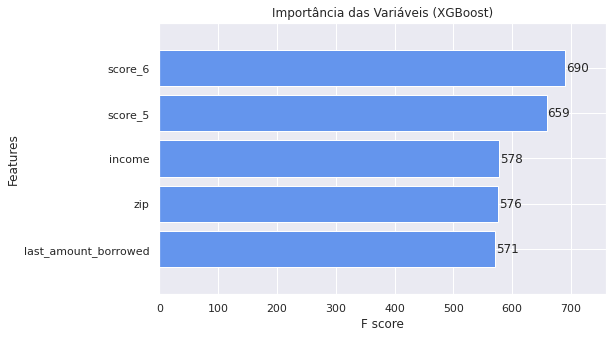

In [111]:
#@XGBoost Feature Importance
from xgboost import plot_importance
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
plot_importance(xgb, height=0.8, max_num_features=5, title="Importância das Variáveis (XGBoost)", ax=ax, color='cornflowerblue') 
plt.show()
plt.savefig("Default-variaveis-XGB.jpg")
plt.close()

Há de se observar que o modelo utilizando o XGBoost deu mais peso para as variáveis `Score_6`e `Score_5`. Já o modelo RandomForest utilizou as variáveis `Income` e `application_time_in_funnel`.

#### Curva ROC

Podemos verificar o desempenho do nosso modelo também pela curva ROC.

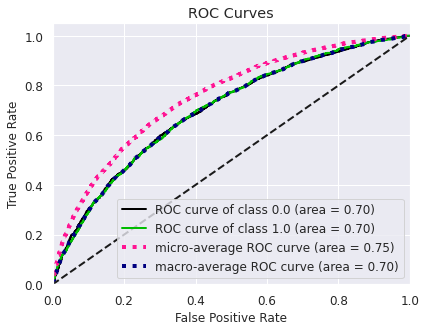

In [112]:
#@ Curva ROC do Modelo
#gerando probabilidades
y_pred_xgb = xgb.predict_proba(X_test)

#plotando o gráfico
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_pred_xgb)
plt.show()

## Scikit-Optimize

Scikit-Optimize é uma biblioteca Python de código aberto que fornece uma implementação de `Otimização Bayesiana` que pode ser usada para ajustar os hiper parâmetros de modelos de machine learning da biblioteca Python scikit-Learn.

Em contraste com GridSearchCV, nem todos os valores de parâmetro são testados, mas em vez disso, um número fixo de configurações de parâmetros é amostrado a partir do especificado distribuições. A abordagem bayesiana rastreia os resultados de avaliação anteriores que são usados ​​para formar um modelo probabilístico que mapeia hiper parâmetros para as probabilidades de pontuação da função objetivo.

O `Bayes Search` é a automação para *tunning* dos hiper parâmetros. É uma biblioteca relativamente nova que está em desenvolvimento e que facilita a nossa busca no refinamento dos hiper parâmetros.

In [113]:
# 1. importar as bibliotecas necessárias
import skopt
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold

#2. Definir intervalos de otimziação
bayes = BayesSearchCV(
    estimator = XGBClassifier(
        n_jobs = 1,
        eval_metric = 'auc',
        silent=1,
        tree_method='exact',
        booster='gbtree',
        objective='binary:logistic',
        sampling_method='uniform',
        scale_pos_weight=5.187141004261627
    ),
    #2.1 Definindo intervalos de otimização
    search_spaces = {
        'learning_rate': (1e-5, 1.0, 'log-uniform'),
        'max_depth': (1, 5),
        'max_delta_step': (0, 20),
        'reg_alpha': (.001, 15.0), 
        'reg_lambda': (.001, 15.0),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'gamma': (1e-4, 0.5, 'log-uniform'),
        'n_estimators': (50, 500),
    },   
    #2. definindo método de avaliação
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=10,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = 6,   
    verbose = 0,
    refit = True,
    random_state = 42
)

# callback handler
def status_print_bayes(optim_result):
    bayes_resultado = bayes.best_score_
    print("Melhor resultado: {:.3%}".format( np.round(bayes_resultado,4)))
    if bayes_resultado >= 0.98:
        print('Suficiente!')
        return True

Conforme explanado no [post](https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/) elaborado por Jason Brownlee para classificação de modelos desbalanceados, estamos tratando de um modelo de probabilidades, onde ambas as classes são importantes:

<center><img alt="Imbalanced Classification Binary" width="50%" src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/12/How-to-Choose-a-Metric-for-Imbalanced-Classification-latest.png"></center>

Por esse motivo defini a métrica ROC AUC para verificar o desempenho do modelo otimizado.

Ainda da [documentação oficial](https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html#handle-imbalanced-dataset) do XGBoost há recomendação para utilizarmos da métrica AUC para dataset desbalanceados, entre outros possíveis ajustes de hyper parâmetros.


In [114]:
%%time
#4. Fit no modelo
otmizador = bayes.fit(X_train, y_train, callback=status_print_bayes)

Melhor resultado: 64.810%
Melhor resultado: 69.430%
Melhor resultado: 69.430%
Melhor resultado: 69.430%
Melhor resultado: 71.480%
Melhor resultado: 71.480%
CPU times: user 21.1 s, sys: 122 ms, total: 21.2 s
Wall time: 6min 10s


In [115]:
print("Melhor ROC_AUC: {:.3%} para {}".format(bayes.best_score_, bayes.best_params_))

Melhor ROC_AUC: 71.476% para OrderedDict([('colsample_bytree', 0.8015579071911014), ('gamma', 0.004171159736456158), ('learning_rate', 0.004296365154903269), ('max_delta_step', 14), ('max_depth', 5), ('n_estimators', 373), ('reg_alpha', 6.3632469088377706), ('reg_lambda', 9.754611242114692), ('subsample', 0.35955300707269167)])


### Varição dos Hyper Parâmetros
Vamos plotar um gráfico para verificarmos como os hyper parâmetros variaram com o aprendizado do modelo que estamos otimizando.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1570181d0>,
      dtype=object)

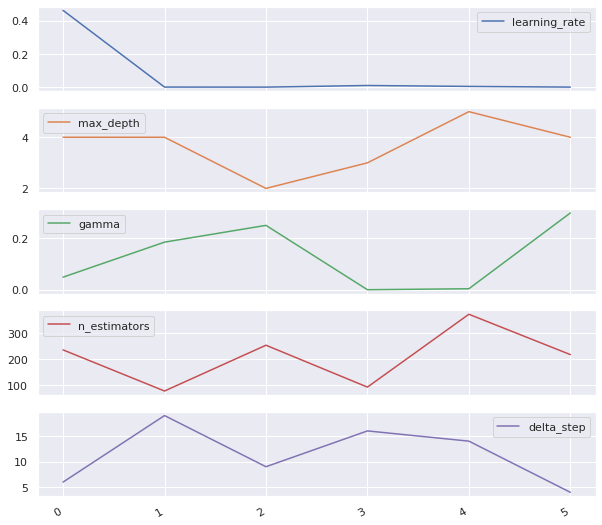

In [116]:
bayes_results_df = pd.DataFrame(np.transpose([
                                              np.array(bayes.cv_results_['param_learning_rate']).data,
                                              np.array(bayes.cv_results_['param_max_depth']).data,
                                              np.array(bayes.cv_results_['param_gamma']).data,
                                              np.array(bayes.cv_results_['param_n_estimators']).data,
                                              np.array(bayes.cv_results_['param_max_delta_step']).data]),
                                              columns=['learning_rate', 'max_depth', 'gamma', 'n_estimators', 'delta_step'])
bayes_results_df.plot(subplots=True,figsize=(10, 10))

Note como o modelo utiliza-se de diferentes combinações dos hyper parâmetros para ajuste a métrica desejada.

## Modelo Otimizado

Após executarmos a otimização dos hiper parâmetros, iremos elaborar o modelo final com base nos dados obtidos nos passos anteriores.

In [47]:
otimizado = XGBClassifier(**bayes.best_params_)

score_otimizado = cross_val_score(otimizado, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print("Scores = ", score_otimizado)
print("ROC_AUC = {:.3%}\n". format(score_otimizado.mean()))

#4. Fit do modelo
otimizado.fit(X_train, y_train, eval_metric='auc')

#5. Fazer previsões em cima do modelo gerado
y_pred_otimizado = otimizado.predict(X_test)

Scores =  [0.70604051 0.6931394  0.69564918 0.6933592  0.70400505]
ROC_AUC = 69.844%



### Relatório de Desempenho

No passo anterior vimos que o nosso resultado ROC_AUC ficou apresentou certa perda de eficiência, vamos utilizar das demais métricas para verificarmos como nosso modelo otimizado se comportou.

In [48]:
# Checando a performance do modelo
# classification report
print('Classification Report:\n', classification_report(y_test, y_pred_otimizado, digits=4))

# acurácia
print('Accuracy Score:\t {:.4f}\n'.format(accuracy_score(y_test, y_pred_otimizado)))

# AUC
print('ROC_AUC:\t {:.4f}\n'.format(roc_auc_score(y_test, y_pred_otimizado)))

Classification Report:
               precision    recall  f1-score   support

         0.0     0.8493    0.9994    0.9183      7085
         1.0     0.6667    0.0063    0.0125      1264

    accuracy                         0.8491      8349
   macro avg     0.7580    0.5029    0.4654      8349
weighted avg     0.8217    0.8491    0.7812      8349

Accuracy Score:	 0.8491

ROC_AUC:	 0.5029



In [49]:
# gerando probabilidades do modelo
y_pred_otimizado_prob = otimizado.predict_proba(X_test)

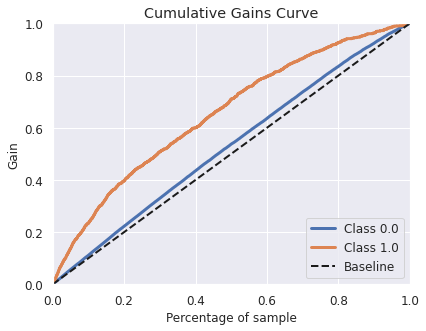

In [50]:
#plotando curva de ganho acumulado
skplt.metrics.plot_cumulative_gain(y_test, y_pred_otimizado_prob)
plt.show()


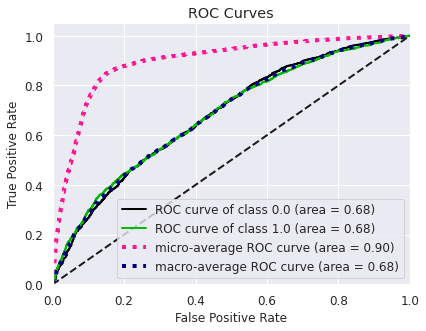

In [51]:
#Plotando curva ROC do modelo
skplt.metrics.plot_roc(y_test, y_pred_otimizado_prob)
plt.show()

Antes de realizar o ajuste do hyper parâmentro para lidar com  o desbalanceamento do dataset, o modelo estava resultando em **overfitting**, isso é, obtinha um resultado melhor durante o treinamento do que a previsão dos valores (praticamente decorando os resultados) ou mesmo se compararmos com os resultados iniciais sem ajustes observei a perda eficiência. O modelo otimizado era muito bom em prever quando não ocorria o `default`, porém o nível de acerto para 1 era extremamente baixo.


O modelo XGBoost é mais sensível a overfitting se os dados apresentarem ruído e o treinamento geralmente leva mais tempo devido ao fato de que as árvores são construídas sequencialmente. 



**GradientBoostMethods** são difíceis de ajustar, pois normalmente existem três parâmetros: número de árvores, profundidade das árvores e taxa de aprendizagem sendo que cada árvore construída é geralmente rasa, porém apresentam ampla customização dos hyper parâmetros. Após consulta a documentação oficial, observei que poderia ajustar o parâmetro `scale_pos_weight` para o valor `5.1871` (conforme demonstrado nos passos anteriores), permitindo assim um ajuste adequado aos dados disponíveis durante o treinamento do modelo e obtenção de resultados mais adequados.

O princípio geral é que queremos um modelo simples e preditivo. A compensação entre os dois também é conhecida como compensação de viés-variância ou **bias-variance tradeoff**.

Do site oficial do [XGBoost](https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html#understanding-bias-variance-tradeoff) temos ainda sobre o viés-variância:


> "Quando permitimos que o modelo fique mais complicado (por exemplo, mais profundidade), o modelo tem melhor capacidade para ajustar os dados de treinamento, resultando em um modelo menos tendencioso. No entanto, esse modelo complicado requer mais dados para se ajustar.
 A maioria dos parâmetros no XGBoost são sobre compensação de variação de polarização. O melhor modelo deve negociar a complexidade do modelo com seu poder preditivo com cuidado. A documentação de parâmetros dirá se cada parâmetro tornará o modelo mais conservador ou não. Isso pode ser usado para ajudá-lo a girar o botão entre o modelo complicado e o modelo simples."





# Redes Neurais

Podemos ainda elaborar um modelo de redes neurais para prever o risco de `default` de uma cliente, vejamos como o modelo se comportará:

Primeiramente iremos importar as bibliotecas necessárias

In [52]:
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization

A seguir iremos dividir novamente nosso dataset em treino e teste e realizar o redimensionar nossos dados de treino e teste para compatibilizar com a API do Keras

In [53]:
#separando do dataset a variável alvo
X = df_clean.drop('target_default', axis=1)
y = df_clean['target_default']

#dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#normalizar apenas as colunas numéricas
X_train.loc[:,num_df] = scaler.fit_transform(X_train.loc[:,num_df].values)
X_test.loc[:,num_df] = scaler.transform(X_test.loc[:,num_df].values)

#trasformando as variáveis categóricas
X_train.loc[:,cat_X] = X_train.loc[:,cat_X].apply(lambda i: label_dict[i.name].transform(i))
X_test.loc[:,cat_X] = X_test.loc[:,cat_X].apply(lambda i: label_dict[i.name].transform(i))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [54]:
print(X_train.shape ,y_train.shape, X_test.shape, y_test.shape)

(33392, 26) (33392,) (8349, 26) (8349,)


In [55]:
#transoformando os datasets de treino e testes em matriz
X_train_keras = np.array(X_train)
X_test_keras = np.array(X_test)
y_train_keras = np.array(y_train)
y_test_keras = np.array(y_test)

### Desbalanceamento de Categorias - SKLearn

Da biblioteca sklearning podemos ainda utilizar outros recursos para o rebalanceamento do dataset:

**sample_weights** é usado para fornecer um peso para cada amostra de treinamento. Isso significa que você deve passar uma matriz 1D com o mesmo número de elementos que suas amostras de treinamento (indicando o peso de cada uma dessas amostras). No caso de você estar usando dados temporais, você pode passar uma matriz 2D, permitindo que você dê peso a cada passo de tempo de cada amostra.

**class_weights** é usado para fornecer um peso ou tendência para cada classe de saída. Isso significa que você deve passar um peso para cada classe que está tentando classificar. Além disso, este parâmetro também pode ser utilizado com um dicionário de categorias a ser passado para ele. 

In [56]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train_keras),y_train_keras)
#transformar o peso de cada classe em um dicionário para ser utilizado no modelo
class_weight_dict = dict(enumerate(class_weights))

In [57]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_keras)
X_test_scaled = scaler.transform(X_test_keras)

Nesta etapa vamos preparar um modelo de redes neurais com 5 camadas, sendo que na primeira camada e na terceira camada teremos 80 neurons e na quinta camada 40 neurons.

In [58]:
n_entradas = X_train_scaled.shape[1]
#1. Definindo o modelo e hyper parâmetros
keras_model = Sequential([
         Dense(80, input_shape=(n_entradas, ), activation='relu'),
         Dropout(0.2),
         Dense(80, activation='relu'),
         Dropout(0.2),
         Dense(40, activation='relu'),
         BatchNormalization(),
         Dense(1, activation='sigmoid')                 
])
#keras_model.load_weights(class_weights)

Vou deixar aqui uma breve explanação sobre cada função de ativação utilizada.

`ReLu` é a função de ativação amplamente utilizada ao projetar redes neurais. Por se tratar de uma função *não linear* podemos facilmente copiar os erros para trás e ter várias camadas de neurônios ativadas.

A principal vantagem sobre é função `ReLu` sobre as outras funções de ativação é que ela não ativa todos os neurônios ao mesmo tempo, gerando eficiência na utilização dos recursos.

Já a função `sigmoid` converte todos as variáveis reais em probabilidades categóricas. Os elementos do vetor alvo estão no intervalo de 0 a 1 e a somatória é 1. 

Normalmente utilizado na última camada de ativação pois o resultado pode ser interpretado como uma distribuição probabilística.

In [59]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                2160      
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                6480      
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 40)                3240      
_________________________________________________________________
batch_normalization (BatchNo (None, 40)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4

Podemos ainda plotar o sumário:

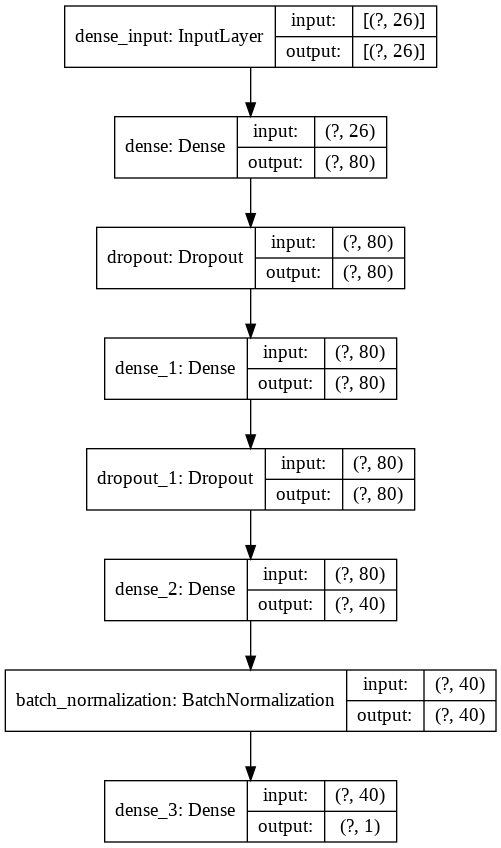

In [60]:
from keras.utils.vis_utils import plot_model
plot_model(keras_model, show_shapes=True, show_layer_names=True)

## Compilando e Treinando o modelo

In [61]:
#2. Instanciando o modelo
keras_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['AUC'])

In [62]:
%%time
#3. Fit do modelo
keras_model.fit(X_train_scaled, y_train_keras, validation_split=0.2, batch_size=25, epochs=150, shuffle=True, verbose=2)

Epoch 1/150
1069/1069 - 2s - loss: 1.9350e-08 - auc: 0.5352 - val_loss: 1.8937e-08 - val_auc: 0.5531
Epoch 2/150
1069/1069 - 2s - loss: 1.9350e-08 - auc: 0.5291 - val_loss: 1.8937e-08 - val_auc: 0.5538
Epoch 3/150
1069/1069 - 2s - loss: 1.9350e-08 - auc: 0.5391 - val_loss: 1.8937e-08 - val_auc: 0.5541
Epoch 4/150
1069/1069 - 2s - loss: 1.9350e-08 - auc: 0.5322 - val_loss: 1.8937e-08 - val_auc: 0.5530
Epoch 5/150
1069/1069 - 2s - loss: 1.9350e-08 - auc: 0.5320 - val_loss: 1.8937e-08 - val_auc: 0.5531
Epoch 6/150
1069/1069 - 2s - loss: 1.9350e-08 - auc: 0.5347 - val_loss: 1.8937e-08 - val_auc: 0.5527
Epoch 7/150
1069/1069 - 2s - loss: 1.9350e-08 - auc: 0.5345 - val_loss: 1.8937e-08 - val_auc: 0.5531
Epoch 8/150
1069/1069 - 2s - loss: 1.9350e-08 - auc: 0.5370 - val_loss: 1.8937e-08 - val_auc: 0.5532
Epoch 9/150
1069/1069 - 2s - loss: 1.9350e-08 - auc: 0.5351 - val_loss: 1.8937e-08 - val_auc: 0.5534
Epoch 10/150
1069/1069 - 2s - loss: 1.9350e-08 - auc: 0.5351 - val_loss: 1.8937e-08 - val_a

In [63]:
#4. Previsões com o modelo
#keras_pred = keras_model.predict(X_train, batch_size=200, verbose=0)
keras_pred = keras_model.predict_classes(X_test_scaled, batch_size=200, verbose=0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


## Avaliando o Desempenho

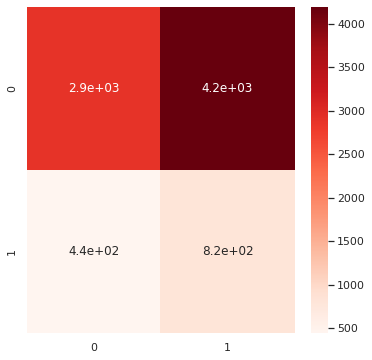

In [64]:
#5. Avaliando o modelo
keras_cm = confusion_matrix(y_test_keras, keras_pred)

fig, ax2 = plt.subplots(figsize=(6,6))
sns.heatmap(keras_cm, ax=ax2, annot=True, cmap=plt.cm.Reds)
ax2.set_title = ("Random UnderSample (RUS) \n Confusion Matrix")
ax2.set_ylabel = ("Verdadeiros")
ax2.set_xlabel = ("Positivos")

plt.show()

In [65]:
print("A acurácia do modelo utilizando TensorFlow é de: {:%}" .format(keras_pred[0][0]))

A acurácia do modelo utilizando TensorFlow é de: 100.000000%


In [66]:
TN, FP, FN, TP = confusion_matrix(y_test, keras_pred.round()).ravel() 
TN, FP, FN, TP

(2896, 4189, 444, 820)

In [67]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
#Sensibilidade, Recall, Taxa de Acerto ou Taxa de Verdadeiros positivos
sensibilidade = TP/(TP+FN)
sensibilidade

0.6487341772151899

In [68]:
#Precision or Positive Predictive Value (PPV)
#Precisão ou Valor Preditivo Positivo 
precisao = TP/ (TP+FP)
precisao

0.16370533040527052

In [69]:
#F1 score( harmonic mean of precision and sensitivity(recall)
#F1 score (média harmônica de precisão e sensibilidade)
F1= 2/ ((1/precisao) + (1/sensibilidade))
F1

0.26143790849673204

In [70]:
#(ROC AUC) - Área sobre a curva ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, keras_pred )

0.5287425296802837

# Conclusão

Podemos observar que mesmo tratando nosso dataset, eliminando outliers e valores ausentes, normalizado e codificando os dados não se trata de um problema trivial. Além disso, nossos dados de amostra se mostraram insuficientes, pois nosso modelo não consegue detectar corretamente muitos casos de `default` e, em vez disso, classifica incorretamente casos onde não ocorreriam. Característica de um dataset desbalanceado.

Da documentação oficial do [TensorFlow](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#applying_this_tutorial_to_your_problem):



> "A classificação de dados desbalanceados é uma tarefa inerentemente difícil, pois há tão poucos exemplos para aprender. Devemos sempre começar com os dados primeiro e fazer o seu melhor para coletar o maior número possível de amostras e pensar bastante sobre quais recursos podem ser relevantes para que o modelo possa obter o máximo de sua classe minoritária. Em algum ponto, o modelo pode ter dificuldades para melhorar e produzir os resultados desejados, portanto, é importante ter em mente o contexto do seu problema e as compensações entre os diferentes tipos de erros."



Ainda há muito espaço para otimizações dos modelo, ajustes dos hiper parâmetros e campos para estudos.

Imagine que um modelo deste poderia elevar em muito as provisões utilizadas pelo banco para cobrir casos em que o cliente não cumpre com suas obrigações financeiras, elevando assim o custo de capital da instituição patrocinadora **Nubank** e consequentemente a taxa de juros a ser cobrada em cada empréstimo do cliente final. 

Grandes empresas de crédito implementam áreas robustas para estudar modelos e ajustá-los conforme crescimento da base de dados. Esse é um campo muito fértil e financeiramente viável de estudos relacionados a Data Science e Machine Learning.


<center><img alt="real desvalorizado" src="https://thumbs.dreamstime.com/b/c%C3%A9dula-de-derretimento-real-brasileira-do-gotejamento-42780741.jpg" width="50%"> </center>

---

Esse notebook faz parte da trilha de conhecimento do curso:
# **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

Para saber mais clique no [link](https://cursos.sigmoidal.ai/) 


<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

---